# This Jupyter Notebook has the goal to analyse other options to the main CA.

In [1]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn import preprocessing

from sklearn.model_selection import train_test_split 

In [2]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
ca1 = pd.read_csv("aps_failure_set.csv")

In [4]:
ca1.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [5]:
ca1.index.values

array([    0,     1,     2, ..., 59997, 59998, 59999])

ca1.drop([0, 1, 2, 3, 4, 5, 6], axis = 0)

https://www.youtube.com/watch?v=Zj5TDnR_1vU

https://www.youtube.com/watch?v=_XAlbnr8vmo

https://www.youtube.com/watch?v=P8M9KFRBWGg

https://www.youtube.com/watch?v=hbixbMoDS6c

In [6]:
miss_vals = ["na"]

In [7]:
ca1 = pd.read_csv("aps_failure_set.csv", na_values = miss_vals)

In [8]:
ca1['class'].replace('neg', 0, inplace = True)
ca1['class'].replace('pos', 1, inplace = True)

In [9]:
isnull = ca1.isnull().sum()

nperc = (isnull / (len(ca1))) * 100

more_than_50 = nperc[nperc > 50]

print(more_than_50)

ab_000    77.215000
bm_000    65.915000
bn_000    73.348333
bo_000    77.221667
bp_000    79.566667
bq_000    81.203333
br_000    82.106667
cr_000    77.215000
dtype: float64


In [10]:
ca1_d = ca1.dropna(axis = 0)

In [11]:
ca1_d.head(3)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
16,0,31300,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
179,0,97000,0.0,378.0,160.0,0.0,0.0,0.0,0.0,0.0,...,1078982.0,313334.0,511330.0,552328.0,871528.0,871104.0,1980.0,42.0,0.0,0.0
225,0,124656,2.0,278.0,170.0,0.0,0.0,0.0,0.0,0.0,...,1205696.0,866148.0,697610.0,700400.0,1900386.0,437532.0,3680.0,0.0,0.0,0.0


In [12]:
ca1_d.count()

class     591
aa_000    591
ab_000    591
ac_000    591
ad_000    591
         ... 
ee_007    591
ee_008    591
ee_009    591
ef_000    591
eg_000    591
Length: 171, dtype: int64

In [13]:
ca1_class = ca1_d[["class"]]

ca1_class.head(3)

,class
16,0
179,0
225,0


In [14]:
ca1_class.reset_index(inplace = True)

In [15]:
ca1_class.head(3)

,index,class
0,16,0
1,179,0
2,225,0


In [16]:
ca1_class.drop(["index"], axis = 1, inplace = True)

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_8452/2582206424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca1_class.drop(["index"], axis = 1, inplace = True)


In [17]:
ca1_class.head(3)

,class
0,0
1,0
2,0


In [18]:
ca1_split = ca1_d.drop(ca1_class, axis = 1)

ca1_split.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
16,31300,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,20386.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
179,97000,0.0,378.0,160.0,0.0,0.0,0.0,0.0,0.0,84938.0,...,1078982.0,313334.0,511330.0,552328.0,871528.0,871104.0,1980.0,42.0,0.0,0.0
225,124656,2.0,278.0,170.0,0.0,0.0,0.0,0.0,0.0,194792.0,...,1205696.0,866148.0,697610.0,700400.0,1900386.0,437532.0,3680.0,0.0,0.0,0.0
394,281324,2.0,3762.0,2346.0,0.0,0.0,4808.0,215720.0,967572.0,2037438.0,...,624606.0,269976.0,638838.0,1358354.0,819918.0,262804.0,2824.0,0.0,0.0,0.0
413,43482,0.0,1534.0,1388.0,0.0,0.0,0.0,0.0,40024.0,493856.0,...,497196.0,121166.0,202272.0,232636.0,645690.0,50.0,0.0,0.0,0.0,0.0


In [19]:
X = ca1_split

y = ca1_class

In [20]:
X.head(3)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
16,31300,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,20386.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
179,97000,0.0,378.0,160.0,0.0,0.0,0.0,0.0,0.0,84938.0,...,1078982.0,313334.0,511330.0,552328.0,871528.0,871104.0,1980.0,42.0,0.0,0.0
225,124656,2.0,278.0,170.0,0.0,0.0,0.0,0.0,0.0,194792.0,...,1205696.0,866148.0,697610.0,700400.0,1900386.0,437532.0,3680.0,0.0,0.0,0.0


In [21]:
y.value_counts()

class
0        515
1         76
dtype: int64

In [22]:
y.head(30)

,class
0,0
1,0
2,0
3,1
4,1
5,0
6,1
7,0
8,1
9,0


# THE PROBLEM IS THIS INDEX THAT CARRIED OUT FROM THE ORIGINAL DATASET. HOW DO I DEAL WITH THIS?

In [23]:
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

In [25]:
pca = PCA()

pca.fit(X_scaled)

PCA()

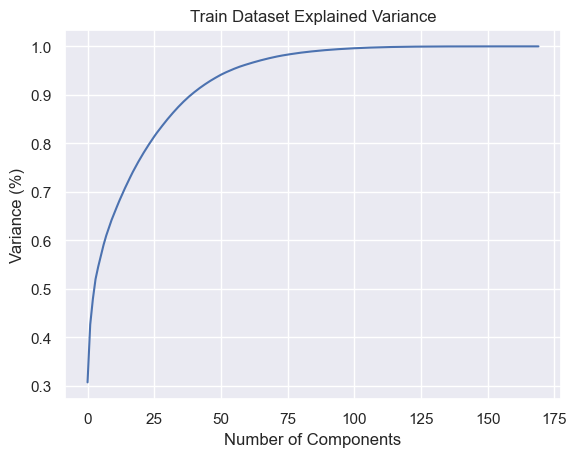

In [26]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.title("Train Dataset Explained Variance")
plt.show()

In [27]:
pca = PCA(n_components = 70)

ca1_pca = pca.fit_transform(X_scaled)

In [28]:
ca1_pca = pd.DataFrame(ca1_pca)

ca1_pca.head(3)

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,-1.111123,2.276933,0.706083,-1.250631,1.051323,-3.182069,-4.286958,4.057871,-0.090191,-1.334371,...,-0.940823,-0.833366,0.618302,0.270381,-0.442555,1.091387,0.829858,-0.182969,-1.478839,0.418364
1,-2.309436,2.995928,1.623934,-0.834248,1.037679,-0.092019,-1.317454,0.490783,-1.454822,-0.161797,...,0.093235,-0.017597,0.104075,0.144185,-0.069782,0.003030,0.137465,-0.178963,-0.047974,-0.100182
2,-2.449822,2.297508,-2.460531,0.503330,-0.752825,0.349979,0.498796,-0.211760,0.108872,-0.342756,...,0.422127,-0.645097,0.539679,0.774577,-0.193810,0.292288,-1.030791,-0.397380,0.680938,0.051795


In [29]:
ca1_concat = pd.concat([ca1_pca, ca1_class], axis = 1)

ca1_concat.head(3)

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,class
0,-1.111123,2.276933,0.706083,-1.250631,1.051323,-3.182069,-4.286958,4.057871,-0.090191,-1.334371,...,-0.833366,0.618302,0.270381,-0.442555,1.091387,0.829858,-0.182969,-1.478839,0.418364,0
1,-2.309436,2.995928,1.623934,-0.834248,1.037679,-0.092019,-1.317454,0.490783,-1.454822,-0.161797,...,-0.017597,0.104075,0.144185,-0.069782,0.003030,0.137465,-0.178963,-0.047974,-0.100182,0
2,-2.449822,2.297508,-2.460531,0.503330,-0.752825,0.349979,0.498796,-0.211760,0.108872,-0.342756,...,-0.645097,0.539679,0.774577,-0.193810,0.292288,-1.030791,-0.397380,0.680938,0.051795,0


In [30]:
ca1_array = ca1_concat.values

In [31]:
ca1_array

array([[-1.11112342,  2.27693291,  0.70608332, ..., -1.47883915,
         0.41836431,  0.        ],
       [-2.30943563,  2.99592788,  1.62393352, ..., -0.04797364,
        -0.1001816 ,  0.        ],
       [-2.44982231,  2.2975076 , -2.46053129, ...,  0.68093794,
         0.05179492,  0.        ],
       ...,
       [-1.49508936,  1.93815343,  1.07823859, ..., -1.65669504,
        -0.60272887,  0.        ],
       [-3.78014717,  1.23367771, -0.36227598, ..., -0.03095578,
         0.10657286,  0.        ],
       [ 0.72118798, -0.99422922, -4.69997873, ...,  1.01076776,
        -0.73663087,  0.        ]])

In [32]:
X = ca1_array[:,1:70]

y = ca1_array[:,70]

In [33]:
X

array([[ 2.27693291,  0.70608332, -1.25063067, ..., -0.18296931,
        -1.47883915,  0.41836431],
       [ 2.99592788,  1.62393352, -0.83424781, ..., -0.17896305,
        -0.04797364, -0.1001816 ],
       [ 2.2975076 , -2.46053129,  0.50333021, ..., -0.39738022,
         0.68093794,  0.05179492],
       ...,
       [ 1.93815343,  1.07823859,  1.49455141, ...,  0.5023928 ,
        -1.65669504, -0.60272887],
       [ 1.23367771, -0.36227598,  0.64143204, ...,  0.13594077,
        -0.03095578,  0.10657286],
       [-0.99422922, -4.69997873,  3.78170606, ...,  0.0308081 ,
         1.01076776, -0.73663087]])

In [34]:
y

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [36]:
from sklearn import metrics

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

In [37]:
from sklearn import svm

In [38]:
cls_svm = svm.SVC(kernel = "linear") 

cls_svm.fit(X_train, y_train)

y_pred_svm = cls_svm.predict(X_test)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
kNN = KNeighborsClassifier(n_neighbors = 9)

kNN.fit(X_train, y_train)

y_pred_knn = kNN.predict(X_test)

In [41]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [42]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 0)

clf = clf.fit(X_train, y_train)

y_pred_dt = clf.predict(X_test)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:

def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring = 'r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')
    
    
    

In [45]:
lr = LinearRegression().fit(X_train, y_train)

In [46]:
get_cv_scores(lr)

CV Mean:  -0.31848167008859996
STD:  1.3432377097330488




In [47]:
y_pred_lr = lr.predict(X_test)

In [48]:
linear = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
linear.head()

,Actual,Predicted
0,0.0,-0.095259
1,0.0,0.119187
2,0.0,0.114304
3,0.0,-0.033023
4,0.0,-0.409867


In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
nvclassifier = GaussianNB()

nvclassifier.fit(X_train, y_train)

GaussianNB()

In [51]:
y_pred_gnb = nvclassifier.predict(X_test)

print(y_pred_gnb)

[0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]


In [52]:
y_compare = np.vstack((y_test,y_pred_gnb)).T

y_compare[:30,:]

array([[0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.]])

In [53]:
print("Accuracy SVM:", metrics.accuracy_score(y_test, y_pred_svm))

print("Accuracy KNN:", metrics.accuracy_score(y_test, y_pred_knn))

print("Accuracy DT:",metrics.accuracy_score(y_test, y_pred_dt))

print("Accuracy GNB:", accuracy_score(y_test, y_pred_gnb))

print("Accuracy GNB_CV:", cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 10).mean())

Accuracy SVM: 0.957983193277311
Accuracy KNN: 0.957983193277311
Accuracy DT: 0.8907563025210085
Accuracy GNB: 0.8403361344537815
Accuracy GNB_CV: 0.8103389830508474
